In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dataset = pd.read_csv('/kaggle/input/starbucks/starbucks.csv')
dataset.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


In [2]:
#check the datatype
dataset.dtypes

Beverage_category             object
Beverage                      object
Beverage_prep                 object
Calories                       int64
 Total Fat (g)                object
Trans Fat (g)                float64
Saturated Fat (g)            float64
 Sodium (mg)                   int64
 Total Carbohydrates (g)       int64
Cholesterol (mg)               int64
 Dietary Fibre (g)             int64
 Sugars (g)                    int64
 Protein (g)                 float64
Vitamin A (% DV)              object
Vitamin C (% DV)              object
 Calcium (% DV)               object
Iron (% DV)                   object
Caffeine (mg)                 object
dtype: object

In [3]:
#remove the leading and tailing whitespaces in column labels
cols = dataset.columns
dataset.columns = dataset.columns.str.strip()
dataset.dtypes

Beverage_category           object
Beverage                    object
Beverage_prep               object
Calories                     int64
Total Fat (g)               object
Trans Fat (g)              float64
Saturated Fat (g)          float64
Sodium (mg)                  int64
Total Carbohydrates (g)      int64
Cholesterol (mg)             int64
Dietary Fibre (g)            int64
Sugars (g)                   int64
Protein (g)                float64
Vitamin A (% DV)            object
Vitamin C (% DV)            object
Calcium (% DV)              object
Iron (% DV)                 object
Caffeine (mg)               object
dtype: object

# Visualize the beverage categories

In [4]:
#check for unique values
dataset['Beverage_category'].unique()

array(['Coffee', 'Classic Espresso Drinks', 'Signature Espresso Drinks',
       'Tazo® Tea Drinks', 'Shaken Iced Beverages', 'Smoothies',
       'Frappuccino® Blended Coffee', 'Frappuccino® Light Blended Coffee',
       'Frappuccino® Blended Crème'], dtype=object)

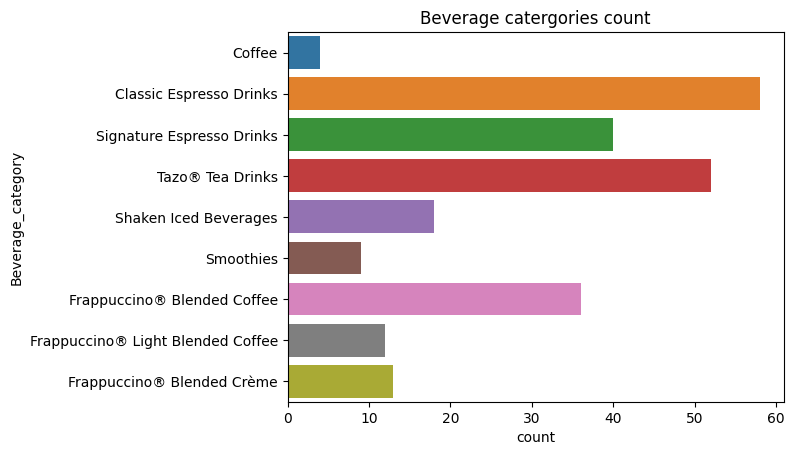

In [5]:
#add title
plt.title('Beverage catergories count')
#plot the count of each beverage cate
sns.countplot(data=dataset, y='Beverage_category')
plt.show()

# Visualize the relationship of Calorie and Caffeine (mg)

In [6]:
#check the unique values
dataset['Caffeine (mg)'].unique()

array(['175', '260', '330', '410', '75', '150', '85', '95', '180', '225',
       '300', '10', '20', '25', '30', '0', 'Varies', '50', '70', '120',
       '55', '80', '110', 'varies', '165', '235', '90', nan, '125', '170',
       '15', '130', '140', '100', '145', '65', '105'], dtype=object)

In [7]:
# drop the rows with "varies", "Varies", or NaN in the Caffeine column
dataset = dataset.dropna(subset=['Caffeine (mg)'])
dataset = dataset[~dataset['Caffeine (mg)'].isin(['Varies', 'varies'])]

#convert the datatype of Caffeine column from object to int64
dataset['Caffeine (mg)'] = pd.to_numeric(dataset['Caffeine (mg)'], errors='coerce')
dataset['Caffeine (mg)'].dtypes

dtype('int64')

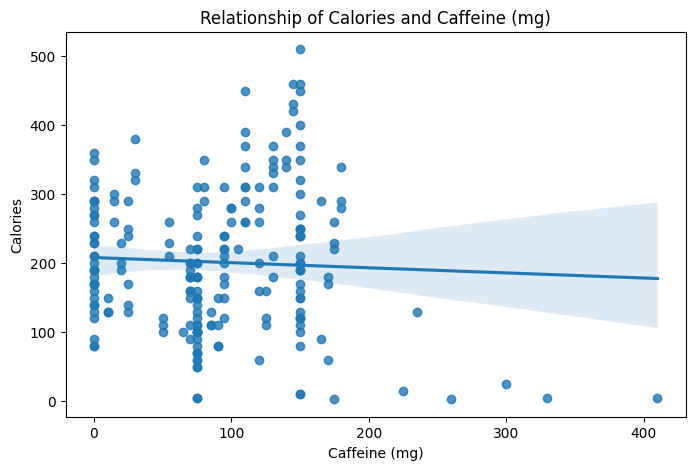

In [8]:
#configure the plot size
plt.figure(figsize=(8,5))
#add title
plt.title('Relationship of Calories and Caffeine (mg)')
#plot the Calorie and Caffeine column in a scatterplot with a linear regression line
sns.regplot(dataset, x='Caffeine (mg)', y='Calories')
plt.show()

# Average Nutritional Content In Each Beverages Category

<function matplotlib.pyplot.show(close=None, block=None)>

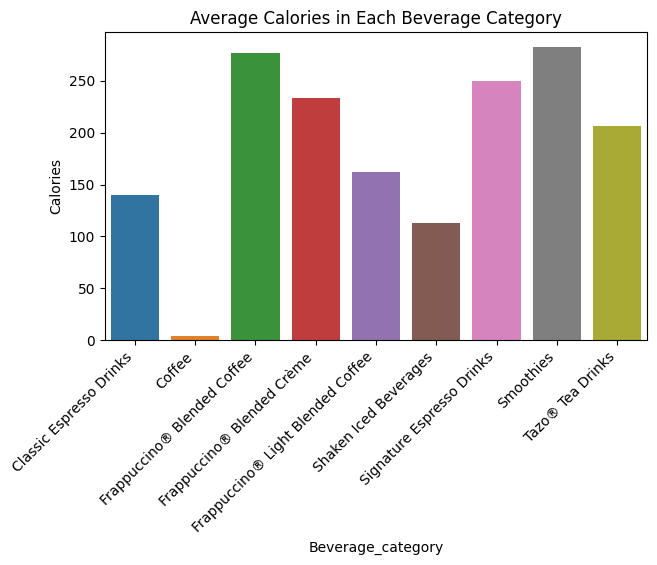

In [9]:
#takes the average of calories of each beverage categories
average_calories_per_category = dataset.groupby('Beverage_category')['Calories'].mean().reset_index()
#configure the plot size
plt.figure(figsize=(7,4))
#modify the horizontal alignment of x labels
plt.xticks(rotation=45, ha='right')
#add title to the plot
plt.title('Average Calories in Each Beverage Category')
#plot the data using bar plot of seaborn
sns.barplot(data=average_calories_per_category, x='Beverage_category', y='Calories')
plt.show

# Pair Plot Correlational Analysis of Nutritional Metrics: 
# Calorie, Total Fat, Sugar, & Protein

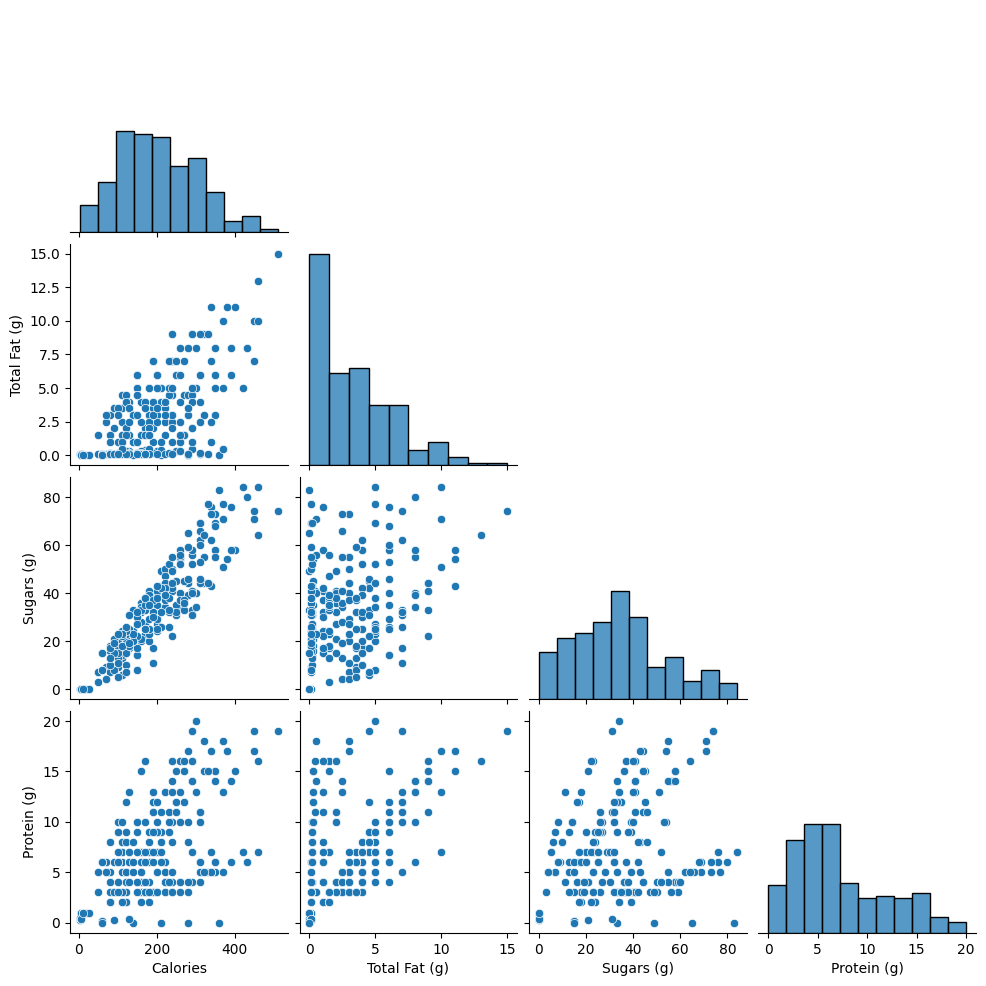

In [10]:
#list columns
nutri_col = ['Calories', 'Total Fat (g)', 'Sugars (g)', 'Protein (g)']
#make a copy of the dataset with the list
correl_df = dataset[nutri_col].copy()
#convert the Total Fat datatype from object to int64
correl_df['Total Fat (g)'] = pd.to_numeric(correl_df['Total Fat (g)'], errors='coerce')
#plot the corre_df using pairplot
sns.pairplot(data=correl_df, corner=True)
plt.show()

# Dietary Fiber Content of Each Beverage Category

<Axes: xlabel='Beverage_category', ylabel='Dietary Fibre (g)'>

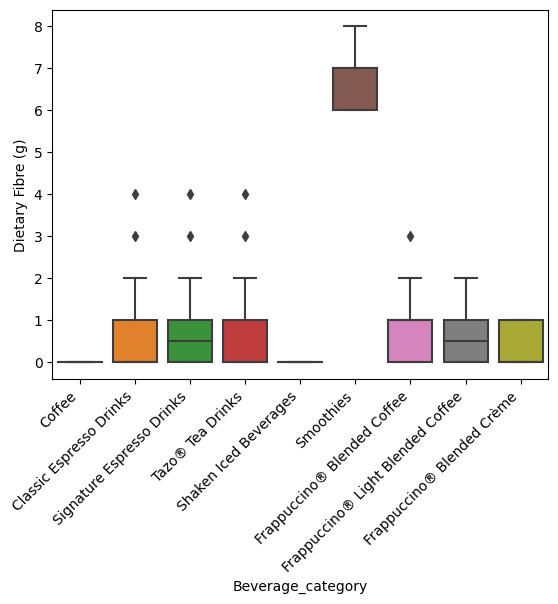

In [11]:
dietary_fib = dataset.groupby('Beverage_category')[['Dietary Fibre (g)']]
plt.xticks(rotation=45, ha='right')
sns.boxplot(data=dataset, x='Beverage_category', y='Dietary Fibre (g)')

# Scatter Plot for Total Carbohydrates vs. Sugars

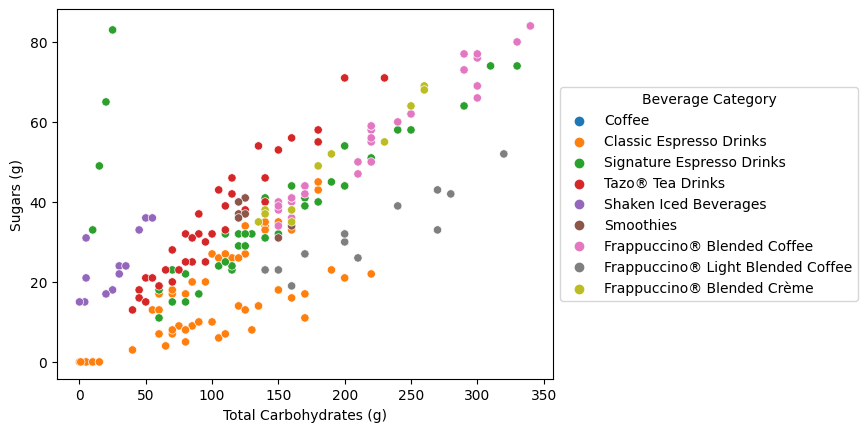

In [12]:
#plot the the Total Carbohydrates and Sugars in scatterplot
scatterplot = sns.scatterplot(data=dataset, x='Total Carbohydrates (g)', y='Sugars (g)', hue='Beverage_category')
#modify the legend to be placed outside the plot
scatterplot.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Beverage Category")

plt.show()